In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
#Reading the data
data = pd.read_csv("advertising.csv")

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
data.shape

(200, 4)

In [24]:
X = data[['TV','Radio' , 'Newspaper']]
y = data['Sales']
X


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.2)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
test_pred = model.predict(X_test)
test_pred

array([20.0013471 , 21.09726397, 11.22680318, 21.2954176 , 19.51965997,
       21.79158152, 21.08506547, 18.63776963, 21.12052574,  6.92268326,
        9.74659281,  5.35000959, 16.93016037, 14.89458395,  6.94186402,
       11.99286713, 21.00510655, 10.11592555,  6.36112184,  8.1007004 ,
       21.35730413, 11.53264161,  9.31344257, 16.2130263 ,  9.46136086,
        9.58746095, 18.47586626, 18.73343363, 21.95604358, 13.02262931,
       23.65704198, 24.28363086, 13.24341401, 16.61433496,  6.97468605,
        9.06823412, 17.46404099, 18.13541754,  8.54241782, 10.79281737,
       20.71700243, 21.10871639, 15.87563073, 10.33727844,  6.19143665,
       10.09496127,  8.85624818, 20.59060647, 12.52343859,  5.43128634,
       18.42132885,  4.38968325, 15.4590923 , 21.54235994, 12.6401875 ,
       13.24248673, 14.35866879,  6.78391592, 17.76452344, 16.529235  ,
       22.73617833, 11.66343145,  8.76630412,  8.13208818, 11.19159247,
       15.02177273,  9.93755796, 14.90946333, 18.98087002, 17.67

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error(test_pred, y_test)

3.222325433539882

In [32]:
mean_squared_error(test_pred, y_test)

3.222325433539882

In [33]:
r2_score(test_pred, y_test)

0.8830871651868979

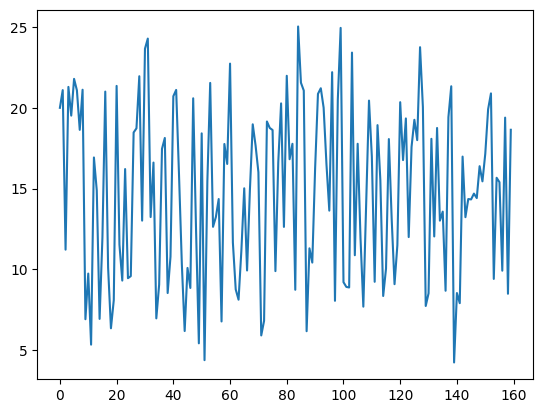

In [37]:
plt.plot(test_pred)
plt.show()

In [38]:
##Daving the file in binary file
from joblib import dump, load

dump(model,'model_linear')


In [40]:
import os
model_dir = 'model'
os.mkdir(model_dir)
filepath = os.path.join(model_dir,'model.joblib')
dump(model, filepath)



['model/model.joblib']

In [42]:
load_model = load('/Users/syedaskari/MSDC!/Machine Learing/MachineLearning/Machine Learing programs/model/model.joblib')

In [43]:
load_model.coef_

array([0.05884293, 0.10307267, 0.00218348])

In [44]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [51]:
##Ploynomial regression
X1 = data.drop(['Sales'], axis=1)

In [48]:
X1.shape

(200, 3)

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [50]:
poly_features.fit(X1)

PolynomialFeatures(include_bias=False)

In [53]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X1)
    X_train, X_test, y_train, y_test = train_test_split(
                                    poly_features, y, test_size=0.33, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [54]:
train_rmse_errors

[1.6094199546576151,
 1.296432681300953,
 1.234394852748795,
 1.059492948176735,
 0.8891773640386184,
 0.9078361486357679,
 5.545083201840422,
 1.1803607926750368,
 0.284770430806775]

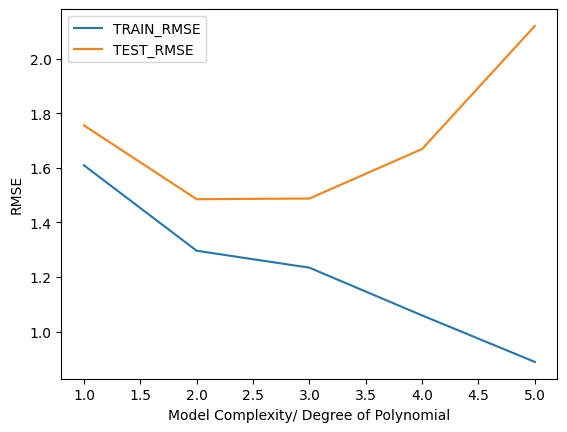

In [55]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN_RMSE') #You will be selecting the 2nd degree polynomial model
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST_RMSE')
plt.xlabel("Model Complexity/ Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()

In [56]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)


In [57]:
final_model = LinearRegression()


In [59]:
full_converted_x = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_x, y)


LinearRegression()

In [60]:
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
filepath = os.path.join(model_dir, 'poly.joblib')
dump(final_model, filepath)


['models/poly.joblib']

In [61]:
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
filepath = os.path.join(model_dir, 'final_poly_converter.joblib')
dump(final_poly_converter, filepath)

['models/final_poly_converter.joblib']